## Analysis of 3 lane highway (A10) with a maximum speed of 100 km/h in opposite directions

Analysis of traffic data from 2017 (tuesdays) in opposite directions. The Data folder contains the raw data as provided by: https://www.ndw.nu/pagina/nl/4/databank/31/actuele_verkeersgegevens/. The Output folder contains the processed data used to construct the graphs.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [39]:
from os import listdir
from os.path import isfile, join


In [40]:
#list of excel file-names in Data folder
path = 'Data'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles = [path + '/' + x for x in onlyfiles]
print(onlyfiles)

['Data/14-02-2017 - intensity.xls', 'Data/11-04-2017 - intensity.xls', 'Data/04-04-2017 - speed.xls', 'Data/28-02-2017 - intensity.xls', 'Data/07-02-2017 - intensity.xls', 'Data/21-03-2017 - speed.xls', 'Data/31-01-2017 - speed.xls', 'Data/21-03-2017 - intensity.xls', 'Data/.~lock.28-03-2017 - speed.xls#', 'Data/24-01-2017 - intensity.xls', 'Data/07-03-2017 - speed.xls', 'Data/14-02-2017 - speed.xls', 'Data/21-02-2017 - speed.xls', 'Data/31-01-2017 - intensity.xls', 'Data/07-03-2017 - intensity.xls', 'Data/04-04-2017 - intensity.xls', 'Data/07-02-2017 - speed.xls', 'Data/28-03-2017 - intensity.xls', 'Data/24-01-2017 - speed.xls', 'Data/28-02-2017 - speed.xls', 'Data/11-04-2017 - speed.xls', 'Data/21-02-2017 - intensity.xls', 'Data/28-03-2017 - speed.xls']


In [41]:
#Importing the data from data-collection points 1 and 2 as dataframes
speed1 = []
speed2 = []
intensity1 = []
intensity2 = []
for x in onlyfiles:
    if x[-9:] == 'speed.xls':
        df = pd.read_excel(x, sheet_name=1,header = 3,usecols = range(0,6),nrows = 24)
        speed1.append(df)
        df = pd.read_excel(x, sheet_name=1,header = 30,usecols = range(0,6),nrows = 24)
        speed2.append(df)    
    if x[-13:] == 'intensity.xls':
        df = pd.read_excel(x, sheet_name=2,header = 3,usecols = range(0,6),nrows = 24)
        intensity1.append(df)
        df = pd.read_excel(x, sheet_name=2,header = 30,usecols = range(0,6),nrows = 24)
        intensity2.append(df)



In [42]:
#Creating dataframes with averages and errors
def averager(frame_list,start_range ,end_range,confidence_interval = 1.96):
    first = True
    for k in frame_list:
        cache = []
        for i in range(start_range, end_range):
            cache.append(k.iloc[:,i].tolist())
        if first:
            average = np.asarray(cache)
            first = False
        else:
            average = average + cache
    average_list = (average/len(frame_list)).tolist()
    error_list = []
    for i in range(start_range, end_range):
        cache = []
        for k in frame_list:
            cache.append(k.iloc[:,i].tolist())
        cache = np.asarray(cache)
        cache = cache.T.tolist()
        cache = [confidence_interval*np.std(x)/np.sqrt(len(x)) for x in cache]
        error_list.append(cache)
    average_frame = copy.deepcopy(frame_list[0])
    error_frame = copy.deepcopy(frame_list[0])
    counter = 0
    for i in range(start_range,end_range):
        n_1 = average_frame.columns[i]
        n_2 = error_frame.columns[i]
        average_frame[n_1] = average_list[counter]
        error_frame[n_2] = error_list[counter]
        counter = counter + 1
    return average_frame, error_frame

def merge_dataframes(intensity,speed):
    df1 = copy.deepcopy(intensity)
    df2 = copy.deepcopy(speed)
    n = df2.columns[0]
    df2.drop(n, axis = 1, inplace = True)
    n = df2.columns[4]
    df2.drop(n, axis = 1, inplace = True)
    result = pd.concat([df1, df2], axis=1, sort=False)
    return result

In [43]:
#Dataframes with averages and error of speed and intensity from 2 data collection points
speed_average_1, speed_error_1 = averager(speed1,1,5)
speed_average_2, speed_error_2 = averager(speed2,1,5)
intensity_average_1,intensity_error_1 = averager(intensity1,1,6)
intensity_average_2,intensity_error_2 = averager(intensity2,1,6)

## Analysis direction 1

In [44]:
#Continueing with only collection point 1 and output to .csv file in Output folder
average = merge_dataframes(intensity_average_1, speed_average_1)
error = merge_dataframes(intensity_error_1,speed_error_1)
cache_average = copy.deepcopy(average)
cache_error = copy.deepcopy(error)
average.to_csv('Output/Average_direction_1.csv')
error.to_csv('Output/Error_direction_1.csv')
print(average)

    Uur op de dag  Intensiteit per uur  Motor/personenauto (%)  \
0   00:00 - 00:59           334.363636               86.568083   
1   01:00 - 01:59           198.909091               79.015228   
2   02:00 - 02:59           129.181818               73.585658   
3   03:00 - 03:59           135.818182               65.876239   
4   04:00 - 04:59           214.727273               64.360598   
5   05:00 - 05:59          1071.272727               77.998921   
6   06:00 - 06:59          4409.818182               84.884337   
7   07:00 - 07:59          5991.636364               87.962547   
8   08:00 - 08:59          5879.909091               88.449018   
9   09:00 - 09:59          4438.454545               85.164244   
10  10:00 - 10:59          3183.727273               81.328597   
11  11:00 - 11:59          2983.545455               81.024734   
12  12:00 - 12:59          3293.272727               82.580241   
13  13:00 - 13:59          3323.181818               82.808927   
14  14:00 

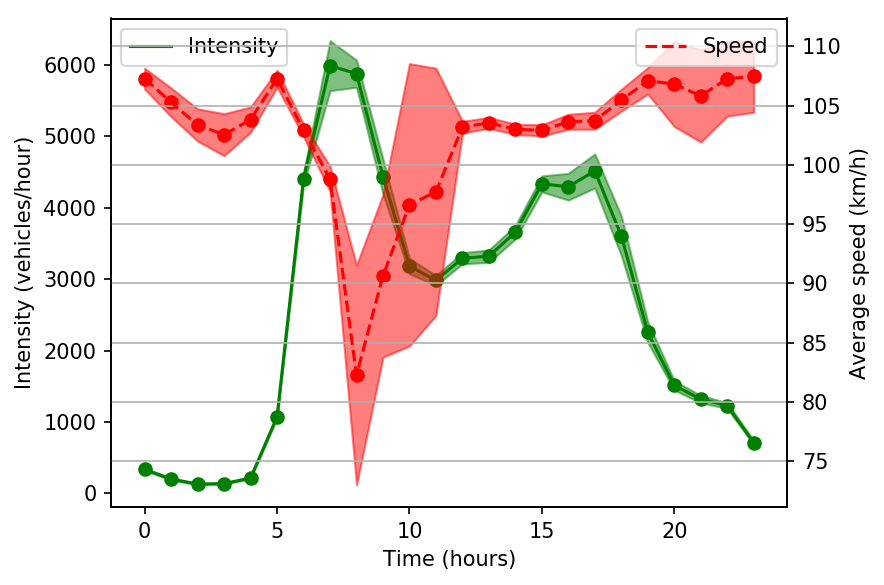

In [45]:
fig, ax1 = plt.subplots()

#Plotting the intensity
plot_variable = np.asarray(average["Intensiteit per uur"].tolist())
plot_error = np.asarray(error["Intensiteit per uur"].tolist())
x_axis = range(0,len(plot_variable))


ax1.set_xlabel('Time (hours)')
ax1.set_ylabel("Intensity (vehicles/hour)")
ax1.scatter(x_axis,plot_variable,c='g')
ax1.plot(x_axis,plot_variable,c='g')
ax1.tick_params(axis='y')
ax1.legend(("Intensity",), loc = 2)
ax1.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'g', alpha = 0.5)

#Plotting the average speed
plot_variable = np.asarray(average["Gemiddelde alle voertuigen"].tolist())
plot_error = np.asarray(error["Gemiddelde alle voertuigen"].tolist())
x_axis = range(0,len(plot_variable))

ax2 = ax1.twinx()  


ax2.set_ylabel('Average speed (km/h)') 
ax2.scatter(x_axis,plot_variable,c='r')
ax2.plot(x_axis,plot_variable,c='r', linestyle = '--')
ax2.tick_params(axis='y')
ax2.legend(("Speed",))
ax2.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'r', alpha = 0.5)
plt.grid(True)
fig.tight_layout()  
plt.show()

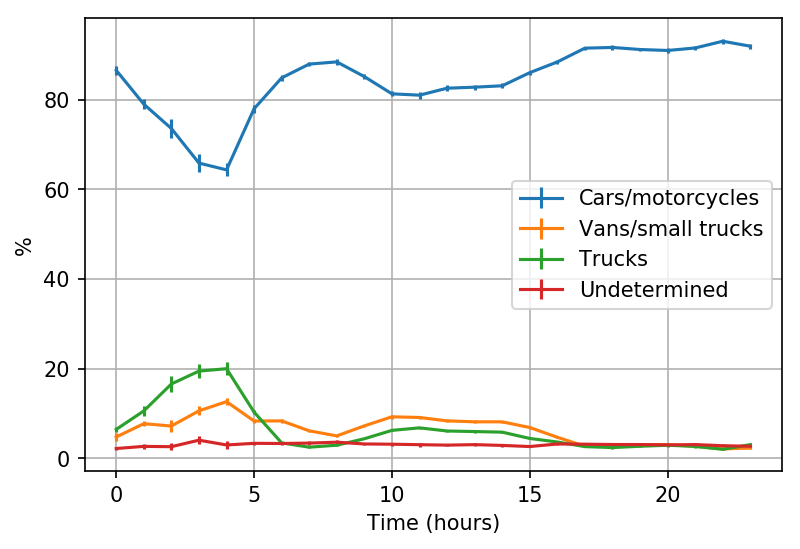

In [46]:
#Plotting the vehicle distribution
cars = np.asarray(average['Motor/personenauto (%)'].tolist())
cars_error = np.asarray(error['Motor/personenauto (%)'].tolist())
vans = np.asarray(average['Licht vrachtverkeer (%)'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer (%)'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer (%)'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer (%)'].tolist())
undetermined = np.asarray(average['Onbepaald  (%)'].tolist())
undetermined_error = np.asarray(error['Onbepaald  (%)'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = undetermined
plot_error = undetermined_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks','Undetermined'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('%')
plt.show()

Maximum speed car/motorcycle: 109.63636363636364 km/h
Maximum speed vans/small trucks: 99.81818181818181 km/h
Maximum speed trucks: 86.18181818181819 km/h


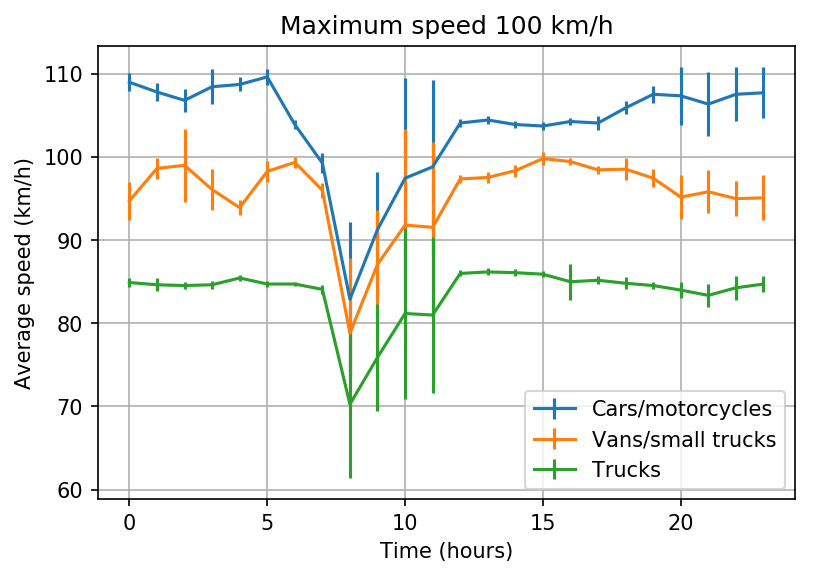

In [47]:
#Plotting the average speed per vehicle
cars = np.asarray(average['Motor/personenauto'].tolist())
cars_error = np.asarray(error['Motor/personenauto'].tolist())
vans = np.asarray(average['Licht vrachtverkeer'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)



plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('Average speed (km/h)')
print("Maximum speed car/motorcycle: " + str(max(cars)) + ' km/h')
print("Maximum speed vans/small trucks: " + str(max(vans))+ ' km/h')
print("Maximum speed trucks: " + str(max(trucks))+ ' km/h')
plt.title('Maximum speed 100 km/h')
plt.show()


## Analysis direction 2

In [48]:
#Continueing with only collection point 2 and output to .csv file in Output folder
average = merge_dataframes(intensity_average_2, speed_average_2)
error = merge_dataframes(intensity_error_2,speed_error_2)
average.to_csv('Output/Average_direction_2.csv')
error.to_csv('Output/Error_direction_2.csv')
print(average)

    Uur op de dag  Intensiteit per uur  Motor/personenauto (%)  \
0   00:00 - 00:59           384.090909               86.246865   
1   01:00 - 01:59           246.909091               76.931268   
2   02:00 - 02:59           150.818182               68.901427   
3   03:00 - 03:59           142.818182               69.997027   
4   04:00 - 04:59           252.454545               68.045395   
5   05:00 - 05:59           821.909091               76.587158   
6   06:00 - 06:59          2689.454545               80.707656   
7   07:00 - 07:59          3831.454545               85.012254   
8   08:00 - 08:59          4287.454545               87.437862   
9   09:00 - 09:59          3415.272727               84.076662   
10  10:00 - 10:59          2937.181818               80.407903   
11  11:00 - 11:59          2873.727273               79.590191   
12  12:00 - 12:59          3164.818182               82.189452   
13  13:00 - 13:59          3320.090909               83.073422   
14  14:00 

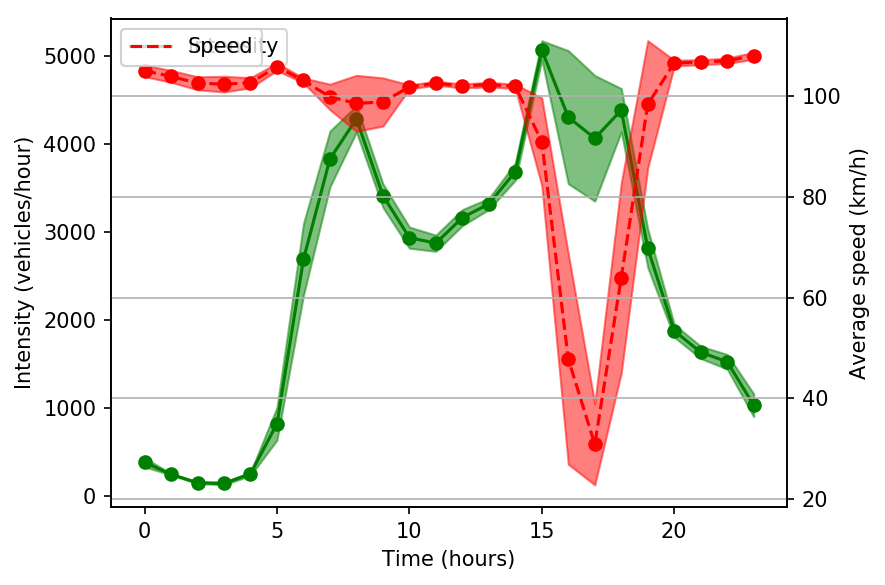

In [49]:
fig, ax1 = plt.subplots()

#Plotting the intensity
plot_variable = np.asarray(average["Intensiteit per uur"].tolist())
plot_error = np.asarray(error["Intensiteit per uur"].tolist())
x_axis = range(0,len(plot_variable))


ax1.set_xlabel('Time (hours)')
ax1.set_ylabel("Intensity (vehicles/hour)")
ax1.scatter(x_axis,plot_variable,c='g')
ax1.plot(x_axis,plot_variable,c='g')
ax1.tick_params(axis='y')
ax1.legend(("Intensity",), loc = 2)
ax1.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'g', alpha = 0.5)

#Plotting the average speed
plot_variable = np.asarray(average["Gemiddelde alle voertuigen"].tolist())
plot_error = np.asarray(error["Gemiddelde alle voertuigen"].tolist())
x_axis = range(0,len(plot_variable))

ax2 = ax1.twinx()  


ax2.set_ylabel('Average speed (km/h)') 
ax2.scatter(x_axis,plot_variable,c='r')
ax2.plot(x_axis,plot_variable,c='r', linestyle = '--')
ax2.tick_params(axis='y')
ax2.legend(("Speed",))
ax2.fill_between(x_axis, plot_variable-plot_error
                 , plot_variable+plot_error, color = 'r', alpha = 0.5)
plt.grid(True)
fig.tight_layout()  
plt.show()

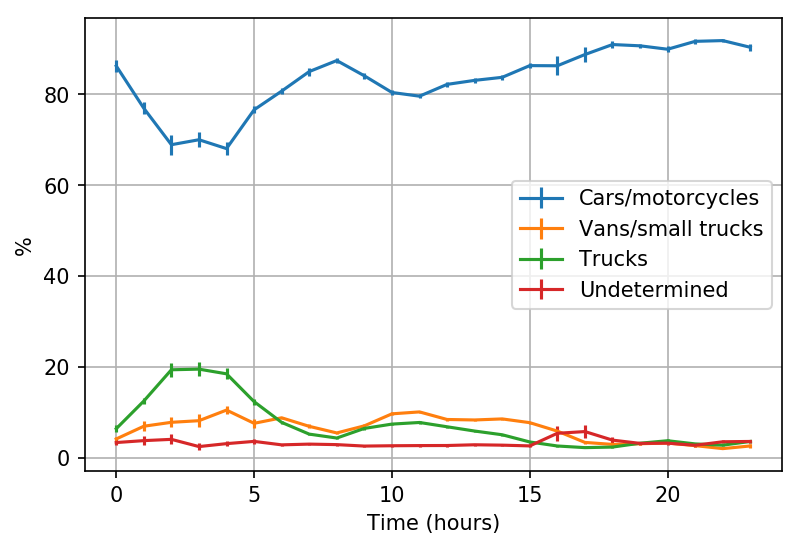

In [50]:
#Plotting the vehicle distribution
cars = np.asarray(average['Motor/personenauto (%)'].tolist())
cars_error = np.asarray(error['Motor/personenauto (%)'].tolist())
vans = np.asarray(average['Licht vrachtverkeer (%)'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer (%)'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer (%)'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer (%)'].tolist())
undetermined = np.asarray(average['Onbepaald  (%)'].tolist())
undetermined_error = np.asarray(error['Onbepaald  (%)'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = undetermined
plot_error = undetermined_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks','Undetermined'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('%')
plt.show()

Maximum speed car/motorcycle: 108.63636363636364 km/h
Maximum speed vans/small trucks: 100.45454545454545 km/h
Maximum speed trucks: 85.27272727272727 km/h


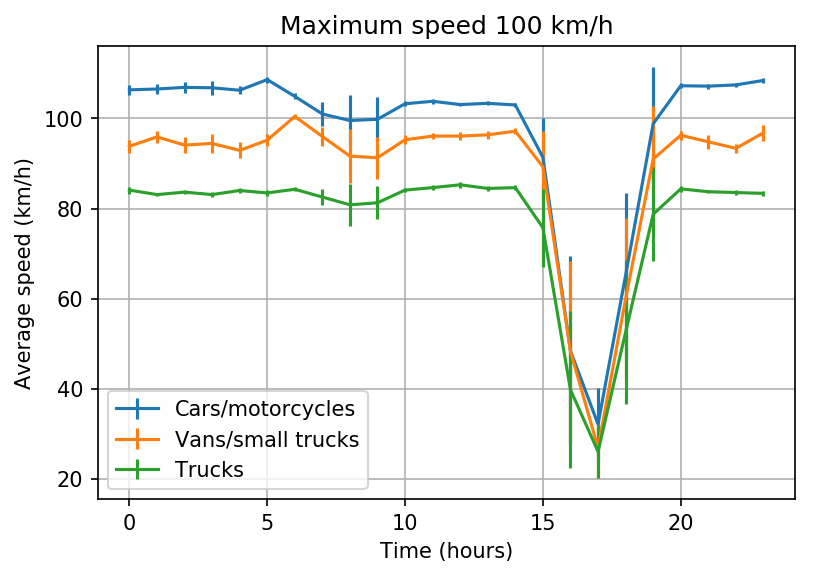

In [51]:
#Plotting the average speed per vehicle
cars = np.asarray(average['Motor/personenauto'].tolist())
cars_error = np.asarray(error['Motor/personenauto'].tolist())
vans = np.asarray(average['Licht vrachtverkeer'].tolist())
vans_error = np.asarray(error['Licht vrachtverkeer'].tolist())
trucks = np.asarray(average['Zwaar vrachtverkeer'].tolist())
trucks_error = np.asarray(error['Zwaar vrachtverkeer'].tolist())
x_axis = range(0,len(cars))

plot_variable = cars
plot_error = cars_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = vans
plot_error = vans_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)

plot_variable = trucks
plot_error = trucks_error
plt.errorbar(x_axis,plot_variable,yerr = plot_error)



plt.legend(('Cars/motorcycles','Vans/small trucks','Trucks'))
plt.grid(True)
plt.xlabel('Time (hours)')
plt.ylabel('Average speed (km/h)')
print("Maximum speed car/motorcycle: " + str(max(cars)) + ' km/h')
print("Maximum speed vans/small trucks: " + str(max(vans))+ ' km/h')
print("Maximum speed trucks: " + str(max(trucks))+ ' km/h')
plt.title('Maximum speed 100 km/h')
plt.show()


## Comparing intensities & speed

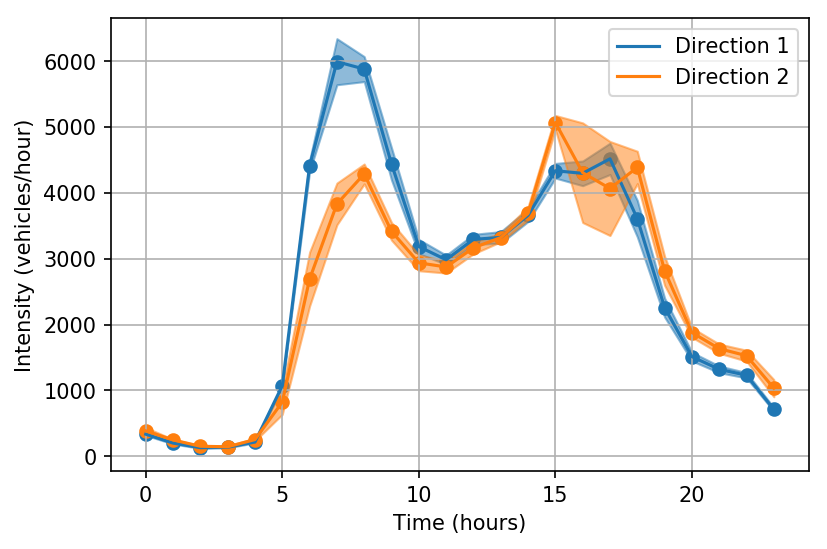

In [52]:
direction_1 = np.asarray(cache_average["Intensiteit per uur"].tolist())
direction_1_error = np.asarray(cache_error["Intensiteit per uur"].tolist())
direction_2 = np.asarray(average["Intensiteit per uur"].tolist())
direction_2_error = np.asarray(error["Intensiteit per uur"].tolist())
x_axis = np.asarray(range(0,24))
plt.xlabel("Time (hours)")
plt.ylabel("Intensity (vehicles/hour)")
plt.plot(direction_1, c = '#1f77b4')
plt.scatter(x_axis, direction_1, c = '#1f77b4')
plt.fill_between(x_axis, direction_1 - direction_1_error
                 , direction_1 + direction_1_error, color = '#1f77b4', alpha = 0.5)
plt.plot(direction_2, c = '#ff7f0e')
plt.scatter(x_axis, direction_2, c = '#ff7f0e')
plt.fill_between(x_axis, direction_2 - direction_2_error
                 , direction_2 + direction_2_error, color = '#ff7f0e', alpha = 0.5)
plt.legend(('Direction 1', 'Direction 2'))
plt.grid(True)
plt.show()



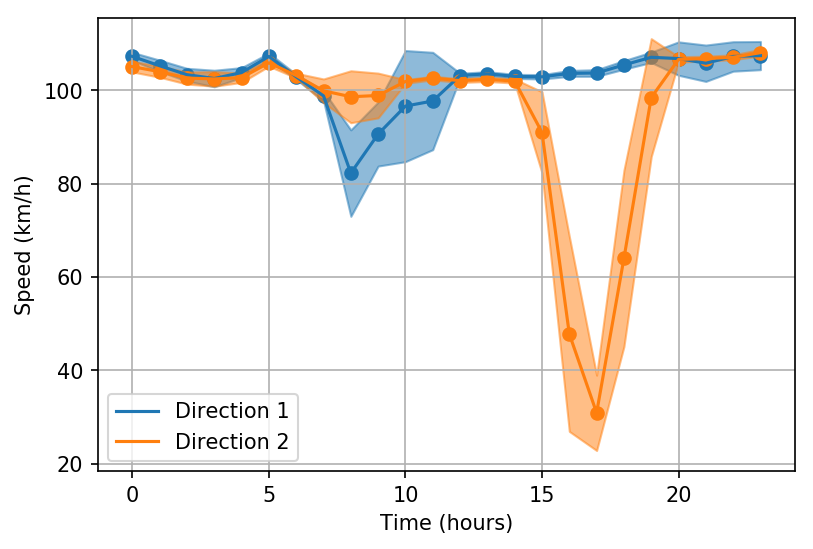

In [53]:
direction_1 = np.asarray(cache_average["Gemiddelde alle voertuigen"].tolist())
direction_1_error = np.asarray(cache_error["Gemiddelde alle voertuigen"].tolist())
direction_2 = np.asarray(average["Gemiddelde alle voertuigen"].tolist())
direction_2_error = np.asarray(error["Gemiddelde alle voertuigen"].tolist())
x_axis = np.asarray(range(0,24))
plt.xlabel("Time (hours)")
plt.ylabel("Speed (km/h)")
plt.plot(direction_1, c = '#1f77b4')
plt.scatter(x_axis, direction_1, c = '#1f77b4')
plt.fill_between(x_axis, direction_1 - direction_1_error
                 , direction_1 + direction_1_error, color = '#1f77b4', alpha = 0.5)
plt.plot(direction_2, c = '#ff7f0e')
plt.scatter(x_axis, direction_2, c = '#ff7f0e')
plt.fill_between(x_axis, direction_2 - direction_2_error
                 , direction_2 + direction_2_error, color = '#ff7f0e', alpha = 0.5)
plt.legend(('Direction 1', 'Direction 2'))
plt.grid(True)
plt.show()
